<a href="https://colab.research.google.com/github/arr4fi/Portfolio/blob/main/Spotify_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Cleaning

##Import Data

In [ ]:
# Data Cleaning - EDA/
import pandas as pd                     #to perform advanced data analysis, import data quickly
import numpy as np                      #to perform arge mahematical operations and statistical operation
from datetime import datetime           #to perform manipulating dates and times

#To show chart
import seaborn as sns                   #to perform visualization with many color palettes, beatifull style and many statistical plots
import matplotlib.pyplot as plt         # to perform simple interactive visualization

In [ ]:
#Import Google Sheet 'Spotify Dataset' file 
sheet_url = 'https://docs.google.com/spreadsheets/d/1NqiSddxEN0-IMe0EfwaYS0NEEqG0uZXjmqdtthEdcKc/edit#gid=1864175452'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(sheet_url_trf)
df.head()

,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,...,loudness,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature
0,Chile,https://open.spotify.com/track/1YXt9FFESbPZfts...,46.40,rodolfo el reno,Villancicos de Navidad y Canciones de Navidad,album,else,28794.0,False,Canciones De Navidad,...,-60.000,0,0.0000,0.000,0.000,0.000,0.000,0.000,164000,0
1,Spain,https://open.spotify.com/track/6zueMZGDJW6r26c...,99.45,última vez,Amaia,album,pop,232619.0,False,Pero No Pasa Nada,...,-16.798,1,0.0000,0.852,0.692,0.104,0.000,0.000,67472,0
2,Taiwan,https://open.spotify.com/track/3kFfAvGOouKO1lS...,32.80,fix me,Beck,album,rock,1158379.0,False,Colors,...,-6.807,1,0.0222,0.842,0.802,0.118,0.361,80.006,193393,4
3,Taiwan,https://open.spotify.com/track/3TC7owBiqwtk6VY...,10.40,不哭,Cyndi Wang,album,pop,114795.0,False,黏黏,...,-5.130,1,0.0222,0.630,0.414,0.926,0.544,91.988,259533,4
4,Sweden,https://open.spotify.com/track/2YVfSh9JykBtqeB...,8.80,till the sun comes around again,Albin Lee Meldau,album,pop,62067.0,False,About You,...,-9.413,1,0.0225,0.429,0.921,0.100,0.396,83.514,202640,3


##Setting The Scope

In [ ]:
df['Country'].unique().tolist()

['Chile',
 'Spain',
 'Taiwan',
 'Sweden',
 'Indonesia',
 'Denmark',
 'Norway',
 'Poland',
 'USA',
 'UK',
 'Austria',
 'Australia',
 'Germany',
 'New Zealand',
 'Finland',
 'Global',
 'Argentina',
 'Belgium',
 'Brazil',
 'Canada',
 'Switzerland',
 'Colombia',
 'Costa Rica',
 'Ecuador',
 'France',
 'Ireland',
 'Italy',
 'Mexico',
 'Malaysia',
 'Netherlands',
 'Peru',
 'Philippines',
 'Portugal',
 'Singapore',
 'Turkey']

In [ ]:
# Filter the country into Global and Indonesia
df1 = df[df["Country"].str.contains("Global|Indonesia")]
df1.head()

,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,...,loudness,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature
5,Indonesia,https://open.spotify.com/track/0przIlLCg6sRuRU...,68064.10,seperti yang kau minta,Chrisye,compilation,pop,705770.0,False,Greatest Hits In Memoriam,...,-6.565,1,0.0227,0.375,0.132,0.124,0.174,85.426,289667,4
22,Global,https://open.spotify.com/track/0tgVpDi06FyKpA1...,129769.90,perfect,Ed Sheeran,album,pop,71783101.0,False,÷ (Deluxe),...,-6.312,1,0.0232,0.163,0.000,0.106,0.168,95.050,263400,3
41,Indonesia,https://open.spotify.com/track/0tgVpDi06FyKpA1...,167086.70,perfect,Ed Sheeran,album,pop,71783101.0,False,÷ (Deluxe),...,-6.312,1,0.0232,0.163,0.000,0.106,0.168,95.050,263400,3
63,Indonesia,https://open.spotify.com/track/5Z6DLYbekZkL8Ov...,4.80,when you say nothing at all,Boyzone,album,boy band,626599.0,False,...By Request,...,-11.152,1,0.0233,0.119,0.237,0.623,0.324,86.999,258827,4
71,Global,https://open.spotify.com/track/1eQuRtkMEPhf2DG...,96.05,ode to my family,The Cranberries,album,rock,2230381.0,False,No Need To Argue (The Complete Sessions 1994-1...,...,-10.110,1,0.0235,0.472,0.146,0.344,0.149,93.930,271533,4


In [ ]:
df1['Release_date'] = pd.to_datetime(df1['Release_date'])

<ipython-input-5-5a08cf1a8d09>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Release_date'] = pd.to_datetime(df1['Release_date'])


In [ ]:
df1['Release_date']

5        2016-07-05
22       2017-03-03
41       2017-03-03
63       1999-01-01
71       1994-10-03
            ...    
170514   2018-03-16
170554   2018-09-28
170578   2019-11-29
170579   2017-08-25
170592   2018-08-31
Name: Release_date, Length: 8530, dtype: datetime64[ns]

In [ ]:
#Filter year 2015-2020
df1 = df1.loc[(df1['Release_date'] >= '2015-01-01')
                     & (df1['Release_date'] < '2020-12-31')]

In [ ]:
df1.head()

,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,...,loudness,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature
5,Indonesia,https://open.spotify.com/track/0przIlLCg6sRuRU...,68064.1,seperti yang kau minta,Chrisye,compilation,pop,705770.0,False,Greatest Hits In Memoriam,...,-6.565,1,0.0227,0.375,0.132,0.124,0.174,85.426,289667,4
22,Global,https://open.spotify.com/track/0tgVpDi06FyKpA1...,129769.9,perfect,Ed Sheeran,album,pop,71783101.0,False,÷ (Deluxe),...,-6.312,1,0.0232,0.163,0.000,0.106,0.168,95.050,263400,3
41,Indonesia,https://open.spotify.com/track/0tgVpDi06FyKpA1...,167086.7,perfect,Ed Sheeran,album,pop,71783101.0,False,÷ (Deluxe),...,-6.312,1,0.0232,0.163,0.000,0.106,0.168,95.050,263400,3
153,Indonesia,https://open.spotify.com/track/3THGXZvzoHYL0Tm...,41.6,selamanya untukmu,Naura,single,else,37703.0,False,Selamanya Untukmu (#TemanNaura),...,-9.463,1,0.0239,0.439,0.285,0.130,0.161,84.931,209547,4
165,Global,https://open.spotify.com/track/5eGX87IiKsGuzS3...,60.8,september - recorded at the tracking room nash...,Taylor Swift,single,pop,33485486.0,False,Spotify Singles,...,-6.482,1,0.0239,0.412,0.121,0.179,0.588,107.081,187824,4


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7853 entries, 5 to 170592
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Country           7853 non-null   object        
 1   Uri               7853 non-null   object        
 2   Popularity        7853 non-null   float64       
 3   Title             7853 non-null   object        
 4   Artist            7853 non-null   object        
 5   Album/Single      7853 non-null   object        
 6   Genre             7853 non-null   object        
 7   Artist_followers  7852 non-null   float64       
 8   Explicit          7853 non-null   bool          
 9   Album             7853 non-null   object        
 10  Release_date      7853 non-null   datetime64[ns]
 11  Track_number      7853 non-null   int64         
 12  Tracks_in_album   7853 non-null   int64         
 13  danceability      7853 non-null   float64       
 14  energy            7853

##Handling Missing Values

In [ ]:
df1.isna().sum()

Country             0
Uri                 0
Popularity          0
Title               0
Artist              0
Album/Single        0
Genre               0
Artist_followers    1
Explicit            0
Album               0
Release_date        0
Track_number        0
Tracks_in_album     0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acoustics           0
instrumentalness    0
liveliness          0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [ ]:
df1.dropna(inplace=True)
df1.head()

,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,...,loudness,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature
5,Indonesia,https://open.spotify.com/track/0przIlLCg6sRuRU...,68064.1,seperti yang kau minta,Chrisye,compilation,pop,705770.0,False,Greatest Hits In Memoriam,...,-6.565,1,0.0227,0.375,0.132,0.124,0.174,85.426,289667,4
22,Global,https://open.spotify.com/track/0tgVpDi06FyKpA1...,129769.9,perfect,Ed Sheeran,album,pop,71783101.0,False,÷ (Deluxe),...,-6.312,1,0.0232,0.163,0.000,0.106,0.168,95.050,263400,3
41,Indonesia,https://open.spotify.com/track/0tgVpDi06FyKpA1...,167086.7,perfect,Ed Sheeran,album,pop,71783101.0,False,÷ (Deluxe),...,-6.312,1,0.0232,0.163,0.000,0.106,0.168,95.050,263400,3
153,Indonesia,https://open.spotify.com/track/3THGXZvzoHYL0Tm...,41.6,selamanya untukmu,Naura,single,else,37703.0,False,Selamanya Untukmu (#TemanNaura),...,-9.463,1,0.0239,0.439,0.285,0.130,0.161,84.931,209547,4
165,Global,https://open.spotify.com/track/5eGX87IiKsGuzS3...,60.8,september - recorded at the tracking room nash...,Taylor Swift,single,pop,33485486.0,False,Spotify Singles,...,-6.482,1,0.0239,0.412,0.121,0.179,0.588,107.081,187824,4


In [ ]:
df1.isna().sum()

Country             0
Uri                 0
Popularity          0
Title               0
Artist              0
Album/Single        0
Genre               0
Artist_followers    0
Explicit            0
Album               0
Release_date        0
Track_number        0
Tracks_in_album     0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acoustics           0
instrumentalness    0
liveliness          0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

##Remove Irrelevant Value

In [ ]:
# df1.drop(df1[df1["danceability"] == 'n'].index, inplace = True)

##Convert Data Type

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7852 entries, 5 to 170592
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Country           7852 non-null   object        
 1   Uri               7852 non-null   object        
 2   Popularity        7852 non-null   float64       
 3   Title             7852 non-null   object        
 4   Artist            7852 non-null   object        
 5   Album/Single      7852 non-null   object        
 6   Genre             7852 non-null   object        
 7   Artist_followers  7852 non-null   float64       
 8   Explicit          7852 non-null   bool          
 9   Album             7852 non-null   object        
 10  Release_date      7852 non-null   datetime64[ns]
 11  Track_number      7852 non-null   int64         
 12  Tracks_in_album   7852 non-null   int64         
 13  danceability      7852 non-null   float64       
 14  energy            7852


1.   Artist_followers -> number
2.   Release_date -> datetime
3.   Track_number -> number
4.   Tracks_in_album -> number
5.   danceability -> number
6.   energy -> number
7.   key -> number
8.   loudness -> number
9.   mode -> number
10.  speechiness -> number
11.  acoustics -> number
12.  instrumentalness -> number
13.  liveliness -> number
14.  valence -> number
15.  tempo -> number
16.  duration_ms -> number
17.  time_signature -> number



In [ ]:
# df1['danceability'] = pd.to_numeric(df1['danceability'])
# df1['speechiness'] = pd.to_numeric(df1['speechiness'])
# df1['energy'] = pd.factorize(df1['energy'])[0].astype(float)
# df1['key'] = pd.to_numeric(df1['key'])
# df1['mode'] = pd.to_numeric(df1['mode'])
# df1['loudness'] = pd.to_numeric(df1['loudness'])
# df1['instrumentalness'] = df1['instrumentalness'].astype(float)
# df1['speechiness'] = df1['speechiness'].astype(float)
# df1['acoustics'] = pd.to_numeric(df1['acoustics'])
# df1['duration_ms'] = pd.to_numeric(df1['duration_ms'])
# df1['liveliness'] = pd.to_numeric(df1['liveliness'])
# df1['Artist_followers'] = pd.to_numeric(df1['Artist_followers'])
# df1['tempo'] = pd.to_numeric(df1['tempo'])
# df1['Track_number'] = pd.to_numeric(df1['Track_number'])
# df1['Tracks_in_album'] = pd.to_numeric(df1['Tracks_in_album'])
# df1['time_signature'] = pd.to_numeric(df1['time_signature'])
# df1['valence'] = pd.to_numeric(df1['valence'])

In [ ]:
df1['Artist_followers'] = pd.factorize(df1['Artist_followers'])[0].astype(float)
df1['Track_number'] = pd.factorize(df1['Track_number'])[0].astype(float)
df1['Tracks_in_album'] = pd.factorize(df1['Tracks_in_album'])[0].astype(float)
df1['danceability'] = pd.factorize(df1['danceability'])[0].astype(float)
df1['energy'] = pd.factorize(df1['energy'])[0].astype(float)
df1['key'] = pd.factorize(df1['key'])[0].astype(float)
df1['loudness'] = pd.factorize(df1['loudness'])[0].astype(float)
df1['mode'] = pd.factorize(df1['mode'])[0].astype(float)
df1['speechiness'] = pd.factorize(df1['speechiness'])[0].astype(float)
df1['acoustics'] = pd.factorize(df1['acoustics'])[0].astype(float)
df1['instrumentalness'] = pd.factorize(df1['instrumentalness'])[0].astype(float)
df1['liveliness'] = pd.factorize(df1['liveliness'])[0].astype(float)
df1['valence'] = pd.factorize(df1['valence'])[0].astype(float)
df1['tempo'] = pd.factorize(df1['tempo'])[0].astype(float)
df1['duration_ms'] = pd.factorize(df1['duration_ms'])[0].astype(float)
df1['time_signature'] = pd.factorize(df1['time_signature'])[0].astype(float)

In [ ]:
df1['Release_date'] = pd.to_datetime(df1['Release_date'])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7852 entries, 5 to 170592
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Country           7852 non-null   object        
 1   Uri               7852 non-null   object        
 2   Popularity        7852 non-null   float64       
 3   Title             7852 non-null   object        
 4   Artist            7852 non-null   object        
 5   Album/Single      7852 non-null   object        
 6   Genre             7852 non-null   object        
 7   Artist_followers  7852 non-null   float64       
 8   Explicit          7852 non-null   bool          
 9   Album             7852 non-null   object        
 10  Release_date      7852 non-null   datetime64[ns]
 11  Track_number      7852 non-null   float64       
 12  Tracks_in_album   7852 non-null   float64       
 13  danceability      7852 non-null   float64       
 14  energy            7852

In [ ]:
df1.loudness.quantile([0.25,0.5,0.75])

0.25     912.00
0.50    1886.50
0.75    2944.25
Name: loudness, dtype: float64

In [ ]:
# create a list of our conditions
conditions = [
    (df1['loudness'] <= 1024),
    (df1['loudness'] > 1024) & (df1['loudness'] < 3590),
    (df1['loudness'] >= 3590)
    ]

# create a list of the values we want to assign for each condition
values = ['low', 'medium', 'high']

# create a new column and use np.select to assign values to it using our lists as arguments
df1['loudness_cat'] = np.select(conditions, values)
df1['loudness_cat']

5          low
22         low
41         low
153        low
165        low
          ... 
170514    high
170554    high
170578    high
170579    high
170592    high
Name: loudness_cat, Length: 7852, dtype: object

#Statistics

##EDA

In [ ]:
df1.describe()

,Popularity,Artist_followers,Track_number,Tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature
count,7852.000000,7852.000000,7852.000000,7852.000000,7852.000000,7852.000000,7852.000000,7852.000000,7852.000000,7852.000000,7852.000000,7852.000000,7852.000000,7852.000000,7852.000000,7852.000000,7852.000000
mean,6264.937239,427.390601,4.575267,7.649516,297.928681,358.389837,5.766174,1963.012990,0.412379,507.618441,406.433393,134.291645,260.101503,375.536933,2545.120352,2721.557438,0.080998
std,14934.985865,320.000274,4.823156,8.432892,193.478664,218.073096,3.469699,1209.095343,0.492294,331.020435,238.563641,205.700155,229.333800,234.858975,1535.537577,1618.020458,0.358403
min,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,83.200000,148.750000,2.000000,2.000000,124.000000,174.000000,3.000000,912.000000,0.000000,190.000000,206.000000,1.000000,62.000000,171.000000,1237.000000,1333.000000,0.000000
50%,636.500000,358.500000,2.000000,3.000000,282.000000,351.000000,6.000000,1886.500000,0.000000,474.000000,397.000000,1.000000,185.000000,357.000000,2444.000000,2646.500000,0.000000
75%,4590.100000,647.000000,7.000000,12.000000,467.000000,542.000000,9.000000,2944.250000,1.000000,805.000000,605.000000,230.000000,417.000000,567.000000,3821.250000,4072.250000,0.000000
max,221571.000000,1264.000000,31.000000,43.000000,715.000000,816.000000,11.000000,4348.000000,1.000000,1171.000000,892.000000,785.000000,862.000000,865.000000,5444.000000,5712.000000,3.000000


In [ ]:
# how many unique songs are there in the dataset?
# counting unique values
n = len(pd.unique(df1['Title']))
  
print("No.of.unique values :", 
      n)

No.of.unique values : 5422


#Business Question

##Correlation Map

In [ ]:
df_global = df1[df1["Country"].str.contains("Global")]

                  Popularity  danceability    energy  loudness      mode  \
Popularity          1.000000      0.005073 -0.011240 -0.031648 -0.001115   
danceability        0.005073      1.000000 -0.012162  0.204864  0.025425   
energy             -0.011240     -0.012162  1.000000  0.086191  0.027680   
loudness           -0.031648      0.204864  0.086191  1.000000  0.046535   
mode               -0.001115      0.025425  0.027680  0.046535  1.000000   
speechiness        -0.057721      0.264434  0.055961  0.661465  0.053582   
acoustics           0.010872      0.091722  0.046081  0.142613  0.035571   
instrumentalness   -0.007628      0.052943  0.018195  0.021307  0.009968   
liveliness          0.001080      0.052933  0.080355  0.076039 -0.007475   
valence             0.017318      0.102610  0.090819  0.098188  0.038724   
tempo              -0.048103      0.191947  0.059572  0.598314  0.045208   
duration_ms        -0.052064      0.260363  0.068225  0.627055  0.054891   
time_signatu

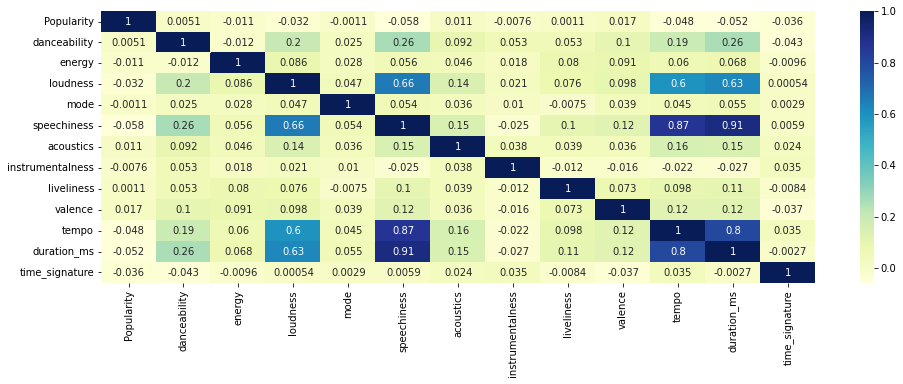

In [ ]:
# Correl Map in Global Scope
corr_df = df_global[['Popularity','danceability','energy','loudness','mode','speechiness','acoustics',
              'instrumentalness','liveliness','valence','tempo','duration_ms',
              'time_signature']]
print(corr_df.corr())
plt.figure(figsize = (16,5))

# plotting correlation heatmap
dataplot = sns.heatmap(corr_df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap


plt.show()

In Global Scope,
- tempo strong correl with loudness
- duration strong correl with loudness
- tempo strong correl with duration

Popularitas
- duration have strong correl with popularity
- danceability strong correl with popularity
- speechniess strong negative with popularity
- instrumentalness have strong correl with popularity
- acoustics have strong correl with popularity
- loudness have strong correl with popularity
- valence strong correl with popularity
- tempo strong negative with popularity


In [ ]:
df_indo = df1[df1["Country"].str.contains("Indonesia")]

                  Popularity  danceability    energy  loudness      mode  \
Popularity          1.000000     -0.008575 -0.060381 -0.080567 -0.045417   
danceability       -0.008575      1.000000  0.108691  0.231023  0.055138   
energy             -0.060381      0.108691  1.000000  0.297003  0.072926   
loudness           -0.080567      0.231023  0.297003  1.000000  0.111335   
mode               -0.045417      0.055138  0.072926  0.111335  1.000000   
speechiness        -0.095390      0.248802  0.258671  0.777822  0.137321   
acoustics          -0.021316      0.155211  0.132151  0.259089  0.042085   
instrumentalness   -0.071679      0.114017  0.057510  0.084655  0.016149   
liveliness         -0.034152      0.122622  0.197533  0.264337  0.049756   
valence            -0.015768      0.186976  0.201946  0.282954  0.050357   
tempo              -0.095080      0.229228  0.274490  0.758624  0.139966   
duration_ms        -0.094570      0.273044  0.294498  0.761058  0.144890   
time_signatu

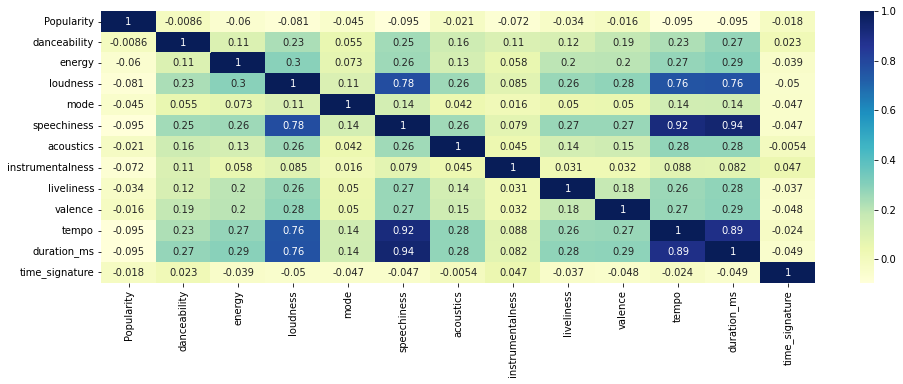

In [ ]:
# Correl Map in Indonesia Scope
corr_df_indo = df_indo[['Popularity',
              'danceability','energy','loudness','mode','speechiness','acoustics',
              'instrumentalness','liveliness','valence','tempo','duration_ms',
              'time_signature']]
print(corr_df_indo.corr())
plt.figure(figsize = (16,5))

# plotting correlation heatmap
dataplot = sns.heatmap(corr_df_indo.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap


plt.show()

In Indonesia Scope,
- tempo strong correl with loudness
- duration strong correl with loudness
- tempo strong correl with duration

- dance strong correl with popularity
- speechniness strong correl with popularity
- duration strong correl with popularity
- acoustics strong negative correl with popularity
- duration strong negative correl with popularity
- tempo strong correl with popularity
- energy strong negative with popularity

All and all, both Indonesia and Global has **similiarity** on correlation mapping.

- the more tempo that a user listen, the higher its loudness tends to be
- the more longer of the song has, the higher its loudness tends to be
- the more tempo that a user listen, the longer its duration tends to be

In [ ]:
df1.describe()

,Popularity,Artist_followers,Track_number,Tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature
count,7852.000000,7852.000000,7852.000000,7852.000000,7852.000000,7852.000000,7852.000000,7852.000000,7852.000000,7852.000000,7852.000000,7852.000000,7852.000000,7852.000000,7852.000000,7852.000000,7852.000000
mean,6264.937239,427.390601,4.575267,7.649516,297.928681,358.389837,5.766174,1963.012990,0.412379,507.618441,406.433393,134.291645,260.101503,375.536933,2545.120352,2721.557438,0.080998
std,14934.985865,320.000274,4.823156,8.432892,193.478664,218.073096,3.469699,1209.095343,0.492294,331.020435,238.563641,205.700155,229.333800,234.858975,1535.537577,1618.020458,0.358403
min,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,83.200000,148.750000,2.000000,2.000000,124.000000,174.000000,3.000000,912.000000,0.000000,190.000000,206.000000,1.000000,62.000000,171.000000,1237.000000,1333.000000,0.000000
50%,636.500000,358.500000,2.000000,3.000000,282.000000,351.000000,6.000000,1886.500000,0.000000,474.000000,397.000000,1.000000,185.000000,357.000000,2444.000000,2646.500000,0.000000
75%,4590.100000,647.000000,7.000000,12.000000,467.000000,542.000000,9.000000,2944.250000,1.000000,805.000000,605.000000,230.000000,417.000000,567.000000,3821.250000,4072.250000,0.000000
max,221571.000000,1264.000000,31.000000,43.000000,715.000000,816.000000,11.000000,4348.000000,1.000000,1171.000000,892.000000,785.000000,862.000000,865.000000,5444.000000,5712.000000,3.000000


In [ ]:
df_cluster=df1.copy()

In [ ]:
df_cluster.head()

,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,...,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature,loudness_cat
5,Indonesia,https://open.spotify.com/track/0przIlLCg6sRuRU...,68064.1,seperti yang kau minta,Chrisye,compilation,pop,0.0,False,Greatest Hits In Memoriam,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,low
22,Global,https://open.spotify.com/track/0tgVpDi06FyKpA1...,129769.9,perfect,Ed Sheeran,album,pop,1.0,False,÷ (Deluxe),...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,low
41,Indonesia,https://open.spotify.com/track/0tgVpDi06FyKpA1...,167086.7,perfect,Ed Sheeran,album,pop,1.0,False,÷ (Deluxe),...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,low
153,Indonesia,https://open.spotify.com/track/3THGXZvzoHYL0Tm...,41.6,selamanya untukmu,Naura,single,else,2.0,False,Selamanya Untukmu (#TemanNaura),...,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,low
165,Global,https://open.spotify.com/track/5eGX87IiKsGuzS3...,60.8,september - recorded at the tracking room nash...,Taylor Swift,single,pop,3.0,False,Spotify Singles,...,0.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,low


In [ ]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7852 entries, 5 to 170592
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Country           7852 non-null   object        
 1   Uri               7852 non-null   object        
 2   Popularity        7852 non-null   float64       
 3   Title             7852 non-null   object        
 4   Artist            7852 non-null   object        
 5   Album/Single      7852 non-null   object        
 6   Genre             7852 non-null   object        
 7   Artist_followers  7852 non-null   float64       
 8   Explicit          7852 non-null   bool          
 9   Album             7852 non-null   object        
 10  Release_date      7852 non-null   datetime64[ns]
 11  Track_number      7852 non-null   float64       
 12  Tracks_in_album   7852 non-null   float64       
 13  danceability      7852 non-null   float64       
 14  energy            7852

In [ ]:
df_cluster['Popularity'] = np.where(
   (df_cluster['Popularity'] <=4590) , 0, df_cluster['Popularity']
   )
df_cluster.head()

,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,...,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature,loudness_cat
5,Indonesia,https://open.spotify.com/track/0przIlLCg6sRuRU...,68064.1,seperti yang kau minta,Chrisye,compilation,pop,0.0,False,Greatest Hits In Memoriam,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,low
22,Global,https://open.spotify.com/track/0tgVpDi06FyKpA1...,129769.9,perfect,Ed Sheeran,album,pop,1.0,False,÷ (Deluxe),...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,low
41,Indonesia,https://open.spotify.com/track/0tgVpDi06FyKpA1...,167086.7,perfect,Ed Sheeran,album,pop,1.0,False,÷ (Deluxe),...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,low
153,Indonesia,https://open.spotify.com/track/3THGXZvzoHYL0Tm...,0.0,selamanya untukmu,Naura,single,else,2.0,False,Selamanya Untukmu (#TemanNaura),...,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,low
165,Global,https://open.spotify.com/track/5eGX87IiKsGuzS3...,0.0,september - recorded at the tracking room nash...,Taylor Swift,single,pop,3.0,False,Spotify Singles,...,0.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,low


In [ ]:
df_cluster['Popularity'] = np.where(
   (df_cluster['Popularity'] >4590) , 1, df_cluster['Popularity']
   )
df_cluster.head()

,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,...,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature,loudness_cat
5,Indonesia,https://open.spotify.com/track/0przIlLCg6sRuRU...,1.0,seperti yang kau minta,Chrisye,compilation,pop,0.0,False,Greatest Hits In Memoriam,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,low
22,Global,https://open.spotify.com/track/0tgVpDi06FyKpA1...,1.0,perfect,Ed Sheeran,album,pop,1.0,False,÷ (Deluxe),...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,low
41,Indonesia,https://open.spotify.com/track/0tgVpDi06FyKpA1...,1.0,perfect,Ed Sheeran,album,pop,1.0,False,÷ (Deluxe),...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,low
153,Indonesia,https://open.spotify.com/track/3THGXZvzoHYL0Tm...,0.0,selamanya untukmu,Naura,single,else,2.0,False,Selamanya Untukmu (#TemanNaura),...,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,low
165,Global,https://open.spotify.com/track/5eGX87IiKsGuzS3...,0.0,september - recorded at the tracking room nash...,Taylor Swift,single,pop,3.0,False,Spotify Singles,...,0.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,low


In [ ]:
df_cluster.tail()

,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,...,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature,loudness_cat
170514,Global,https://open.spotify.com/track/2aOPvzjpMwikBgn...,0.0,introduction,XXXTENTACION,album,rap,17.0,False,?,...,1.0,1167.0,614.0,1.0,515.0,534.0,5440.0,5708.0,0.0,high
170554,Global,https://open.spotify.com/track/3ZVw1HR1QAQoKBy...,0.0,i love you dwayne,Lil Wayne,album,hip hop,546.0,False,Tha Carter V,...,1.0,1168.0,613.0,1.0,862.0,360.0,5441.0,5709.0,1.0,high
170578,Indonesia,https://open.spotify.com/track/2Ao8XIYegiChCOI...,0.0,wejangan mama,Hindia,album,indie,153.0,False,Menari Dengan Bayangan,...,0.0,1169.0,151.0,1.0,218.0,595.0,5442.0,5710.0,3.0,high
170579,Global,https://open.spotify.com/track/0VJYhKhrHgJ7fgj...,0.0,the explanation,XXXTENTACION,album,rap,17.0,True,17,...,0.0,1170.0,242.0,214.0,165.0,119.0,5443.0,5711.0,2.0,high
170592,Global,https://open.spotify.com/track/0Uv5Kp8sEnriJjk...,0.0,paul - skit,Paul Rosenberg,album,else,1264.0,False,Kamikaze,...,0.0,1171.0,892.0,1.0,112.0,345.0,5444.0,5712.0,0.0,high


In [ ]:
df_cluster['Popularity'] = pd.factorize(df_cluster['Popularity'])[0].astype(int)

                  Popularity  danceability    energy  loudness      mode  \
Popularity          1.000000      0.010941  0.026967  0.057426  0.029575   
danceability        0.010941      1.000000  0.031052  0.237825  0.047381   
energy              0.026967      0.031052  1.000000  0.159232  0.045365   
loudness            0.057426      0.237825  0.159232  1.000000  0.083661   
mode                0.029575      0.047381  0.045365  0.083661  1.000000   
speechiness         0.086032      0.288969  0.126777  0.714357  0.101007   
acoustics          -0.010781      0.121958  0.077837  0.192373  0.043867   
instrumentalness    0.032368      0.075251  0.032001  0.046450  0.014354   
liveliness          0.006938      0.077767  0.121178  0.139666  0.013702   
valence            -0.011987      0.136935  0.130691  0.167898  0.047452   
tempo               0.078565      0.233840  0.134496  0.667692  0.095248   
duration_ms         0.081676      0.292760  0.146618  0.687289  0.103811   
time_signatu

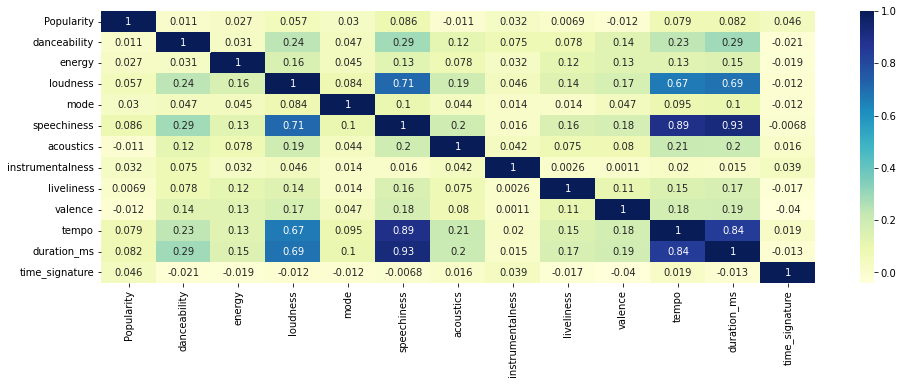

In [ ]:
corr_df_new = df_cluster[['Popularity',
              'danceability','energy','loudness','mode','speechiness','acoustics',
              'instrumentalness','liveliness','valence','tempo','duration_ms',
              'time_signature']]
print(corr_df_new.corr())
plt.figure(figsize = (16,5))

# plotting correlation heatmap
dataplot = sns.heatmap(corr_df_new.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap


plt.show()

In [ ]:
df_indo_cluster = df_cluster[df_cluster["Country"].str.contains("Indonesia")]

                  Popularity  danceability    energy  loudness      mode  \
Popularity          1.000000     -0.007303  0.057510  0.036731  0.041682   
danceability       -0.007303      1.000000  0.108691  0.231023  0.055138   
energy              0.057510      0.108691  1.000000  0.297003  0.072926   
loudness            0.036731      0.231023  0.297003  1.000000  0.111335   
mode                0.041682      0.055138  0.072926  0.111335  1.000000   
speechiness         0.051952      0.248802  0.258671  0.777822  0.137321   
acoustics          -0.021585      0.155211  0.132151  0.259089  0.042085   
instrumentalness    0.055188      0.114017  0.057510  0.084655  0.016149   
liveliness          0.030017      0.122622  0.197533  0.264337  0.049756   
valence             0.014550      0.186976  0.201946  0.282954  0.050357   
tempo               0.058840      0.229228  0.274490  0.758624  0.139966   
duration_ms         0.058251      0.273044  0.294498  0.761058  0.144890   
time_signatu

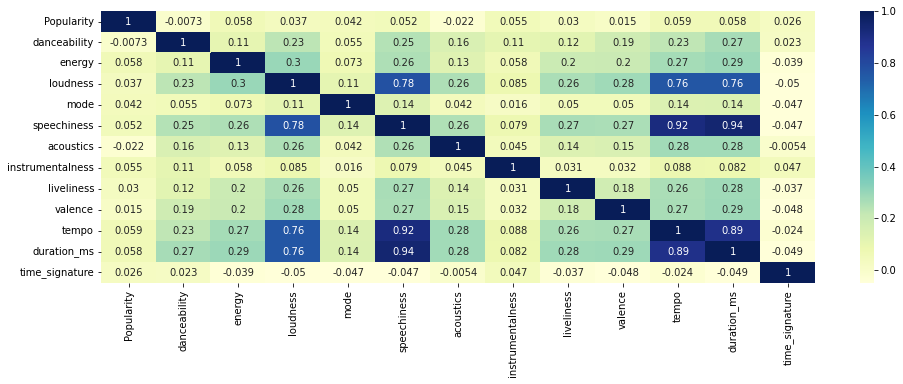

In [ ]:
# Correl Map in Indonesia Scope
corr_df_indo = df_indo_cluster[['Popularity',
              'danceability','energy','loudness','mode','speechiness','acoustics',
              'instrumentalness','liveliness','valence','tempo','duration_ms',
              'time_signature']]
print(corr_df_indo.corr())
plt.figure(figsize = (16,5))

# plotting correlation heatmap
dataplot = sns.heatmap(corr_df_indo.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap


plt.show()

In [ ]:
df_global_cluster = df_cluster[df_cluster["Country"].str.contains("Global")]

                  Popularity  danceability    energy  loudness      mode  \
Popularity          1.000000     -0.003763  0.004121  0.037656  0.008999   
danceability       -0.003763      1.000000 -0.012162  0.204864  0.025425   
energy              0.004121     -0.012162  1.000000  0.086191  0.027680   
loudness            0.037656      0.204864  0.086191  1.000000  0.046535   
mode                0.008999      0.025425  0.027680  0.046535  1.000000   
speechiness         0.065684      0.264434  0.055961  0.661465  0.053582   
acoustics          -0.016873      0.091722  0.046081  0.142613  0.035571   
instrumentalness    0.015465      0.052943  0.018195  0.021307  0.009968   
liveliness         -0.010447      0.052933  0.080355  0.076039 -0.007475   
valence            -0.037815      0.102610  0.090819  0.098188  0.038724   
tempo               0.052272      0.191947  0.059572  0.598314  0.045208   
duration_ms         0.056138      0.260363  0.068225  0.627055  0.054891   
time_signatu

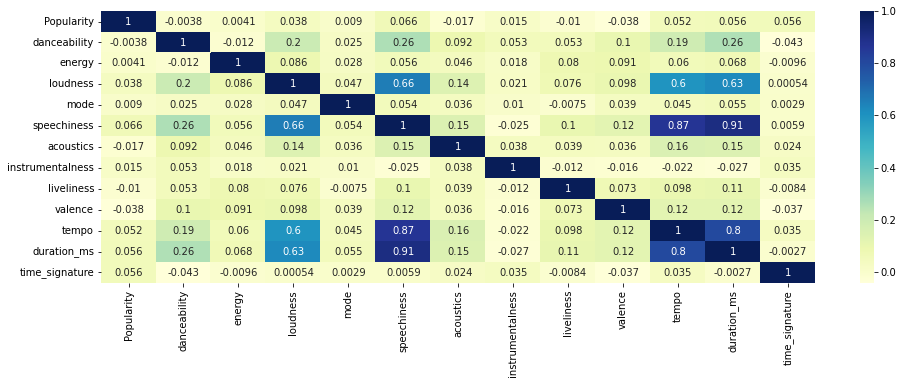

In [ ]:
corr_df = df_global_cluster[['Popularity','danceability','energy','loudness','mode','speechiness','acoustics',
              'instrumentalness','liveliness','valence','tempo','duration_ms',
              'time_signature']]
print(corr_df.corr())
plt.figure(figsize = (16,5))

# plotting correlation heatmap
dataplot = sns.heatmap(corr_df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap


plt.show()

<Figure size 18000x18000 with 0 Axes>

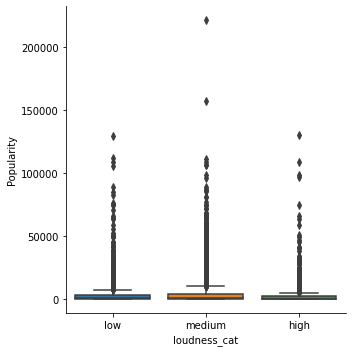

In [ ]:
# Since there are strong correl with loudness, we try to boxplotting the loudness into categorical data to see the popularity of every loudness
# setting the dimensions of the plot
plt.figure(figsize=(250,250))
sns.catplot(data=df_global, x="loudness_cat", y="Popularity", kind="box")

##What is the most popular genre in global by year 2015-2020

In [ ]:
df_global_genre = df_global.copy()

[Text(0.5, 1.0, 'Top 5 Genres by Popularity')]

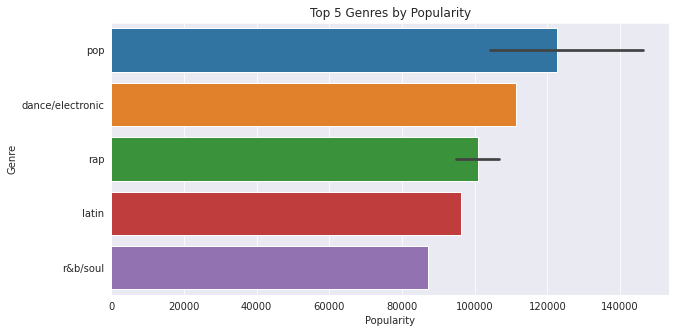

In [ ]:
sns.set_style(style = "darkgrid")
plt.figure(figsize=(10,5))
famous = df_global_genre.sort_values("Popularity", ascending = False).head(20)
sns.barplot(y='Genre', x='Popularity', data = famous).set(title= "Top 5 Genres by Popularity")

In [ ]:
famous

,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,Release_date,Track_number,Tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature,loudness_cat
92588,Global,https://open.spotify.com/track/7qiZfU4dY1lWllz...,221571.00,shape of you,Ed Sheeran,album,pop,1.0,False,÷ (Deluxe),2017-03-03,7.0,1.0,546.0,538.0,10.0,2695.0,1.0,555.0,53.0,1.0,386.0,673.0,2778.0,3075.0,0.0,medium
104212,Global,https://open.spotify.com/track/1rgnBhdG2JDFTbY...,157270.00,dance monkey,Tones And I,single,pop,380.0,False,Dance Monkey,2019-05-10,2.0,2.0,546.0,512.0,3.0,1132.0,1.0,732.0,849.0,40.0,179.0,167.0,3355.0,3480.0,0.0,medium
162775,Global,https://open.spotify.com/track/2Fxmhks0bxGSBdJ...,130062.25,bad guy,Billie Eilish,album,pop,347.0,False,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",2019-03-29,0.0,0.0,82.0,413.0,4.0,4186.0,0.0,1017.0,71.0,10.0,78.0,17.0,5182.0,5438.0,0.0,high
22,Global,https://open.spotify.com/track/0tgVpDi06FyKpA1...,129769.90,perfect,Ed Sheeran,album,pop,1.0,False,÷ (Deluxe),2017-03-03,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,low
10783,Global,https://open.spotify.com/track/2VxeLyX666F8uXC...,111896.05,shallow,Lady Gaga - Bradley Cooper,album,pop,179.0,False,A Star Is Born Soundtrack,2018-10-05,13.0,26.0,167.0,167.0,4.0,388.0,0.0,69.0,138.0,1.0,214.0,20.0,417.0,419.0,0.0,low
48357,Global,https://open.spotify.com/track/2dpaYNEQHiRxtZb...,111270.55,happier,Marshmello - Bastille,single,dance/electronic,177.0,False,Happier,2018-08-17,2.0,2.0,233.0,99.0,2.0,1549.0,0.0,213.0,25.0,1.0,138.0,696.0,1654.0,1660.0,0.0,medium
139480,Global,https://open.spotify.com/track/2xLMifQCjDGFmkH...,109246.35,sicko mode,Travis Scott,album,rap,280.0,True,ASTROWORLD,2018-08-03,4.0,14.0,555.0,204.0,1.0,3742.0,0.0,866.0,702.0,1.0,0.0,357.0,4442.0,4649.0,0.0,high
121621,Global,https://open.spotify.com/track/3ee8Jmje8o58CHK...,108917.90,sad!,XXXTENTACION,album,rap,17.0,True,?,2018-03-16,7.0,4.0,149.0,241.0,1.0,3361.0,0.0,789.0,739.0,442.0,47.0,180.0,3881.0,4044.0,0.0,medium
6593,Global,https://open.spotify.com/track/6v3KW9xbzN5yKLt...,108617.10,señorita,Shawn Mendes - Camila Cabello,album,pop,146.0,False,Shawn Mendes (Deluxe),2019-06-19,2.0,1.0,170.0,205.0,11.0,254.0,1.0,51.0,217.0,1.0,164.0,219.0,259.0,259.0,0.0,low
72052,Global,https://open.spotify.com/track/5uCax9HTNlzGybI...,106907.25,say you wont let go,James Arthur,album,pop,417.0,False,Back from the Edge,2016-10-28,0.0,14.0,227.0,346.0,9.0,2167.0,0.0,350.0,213.0,1.0,571.0,711.0,2362.0,2400.0,0.0,medium


##What is the most popular genre in Indonesia by year 2015-2020

In [ ]:
df_indo_genre = df_indo.copy()

[Text(0.5, 1.0, 'Top 5 Genres by Popularity')]

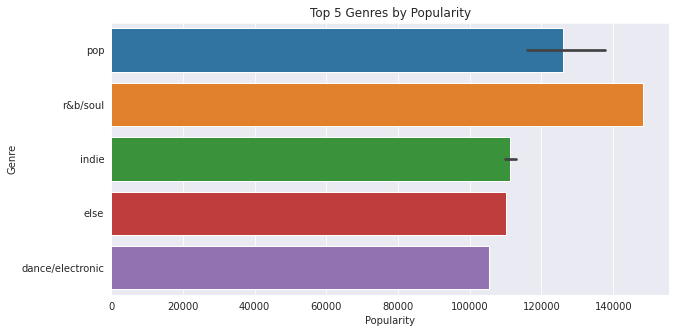

In [ ]:
sns.set_style(style = "darkgrid")
plt.figure(figsize=(10,5))
famous_indo = df_indo_genre.sort_values("Popularity", ascending = False).head(20)
sns.barplot(y='Genre', x='Popularity', data = famous_indo).set(title= "Top 5 Genres by Popularity")

Both Global and Indonesia has similarity on the most favorable genre by Spotify's Users which is 'Pop'

In [ ]:
famous_indo

,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,Release_date,Track_number,Tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature,loudness_cat
72071,Indonesia,https://open.spotify.com/track/5uCax9HTNlzGybI...,167452.70,say you wont let go,James Arthur,album,pop,417.0,False,Back from the Edge,2016-10-28,0.0,14.0,227.0,346.0,9.0,2167.0,0.0,350.0,213.0,1.0,571.0,711.0,2362.0,2400.0,0.0,medium
41,Indonesia,https://open.spotify.com/track/0tgVpDi06FyKpA1...,167086.70,perfect,Ed Sheeran,album,pop,1.0,False,÷ (Deluxe),2017-03-03,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,low
92607,Indonesia,https://open.spotify.com/track/7qiZfU4dY1lWllz...,166625.95,shape of you,Ed Sheeran,album,pop,1.0,False,÷ (Deluxe),2017-03-03,7.0,1.0,546.0,538.0,10.0,2695.0,1.0,555.0,53.0,1.0,386.0,673.0,2778.0,3075.0,0.0,medium
37612,Indonesia,https://open.spotify.com/track/4OBZT9EnhYIV17t...,148203.75,best part,H.E.R. - Daniel Caesar,album,r&b/soul,555.0,False,H.E.R.,2017-10-20,15.0,24.0,346.0,628.0,0.0,1234.0,1.0,166.0,172.0,1.0,12.0,593.0,1305.0,1308.0,0.0,medium
13305,Indonesia,https://open.spotify.com/track/6RUKPb4LETWmmr3...,141831.50,something just like this,The Chainsmokers - Coldplay,album,pop,33.0,False,Memories...Do Not Open,2017-04-07,1.0,11.0,74.0,23.0,8.0,490.0,1.0,78.0,366.0,247.0,87.0,357.0,502.0,500.0,0.0,low
112418,Indonesia,https://open.spotify.com/track/2BgEsaKNfHUdlh9...,132975.95,2002,Anne-Marie,album,pop,476.0,False,Speak Your Mind (Deluxe),2018-04-27,15.0,4.0,147.0,180.0,10.0,3176.0,1.0,761.0,380.0,1.0,107.0,320.0,3605.0,3746.0,0.0,medium
58388,Indonesia,https://open.spotify.com/track/7fa9MBXhVfQ8P8D...,123254.35,girls like you,Maroon 5 - Cardi B,album,pop,354.0,True,Red Pill Blues (Deluxe),2018-06-15,20.0,32.0,572.0,587.0,6.0,1833.0,0.0,265.0,234.0,1.0,2.0,380.0,1962.0,1982.0,0.0,medium
3734,Indonesia,https://open.spotify.com/track/66wRGrt1HmeVa1w...,114628.90,tanpa tergesa,Juicy Luicy,single,pop,15.0,False,Tanpa Tergesa,2018-02-28,2.0,2.0,120.0,129.0,8.0,144.0,0.0,38.0,52.0,1.0,31.0,121.0,145.0,145.0,0.0,low
7404,Indonesia,https://open.spotify.com/track/1SaQZoFXNu7ZAxx...,112765.90,remaja,Hivi!,album,indie,127.0,False,Kereta Kencan,2017-02-23,9.0,5.0,205.0,80.0,11.0,282.0,0.0,55.0,236.0,1.0,175.0,114.0,288.0,289.0,0.0,low
8023,Indonesia,https://open.spotify.com/track/4za8UJq7JI99ilR...,112174.75,pupus,Hanin Dhiya,album,pop,87.0,False,Cerita Hanin Dhiya,2018-03-30,7.0,12.0,226.0,244.0,1.0,309.0,0.0,58.0,254.0,163.0,142.0,262.0,317.0,318.0,0.0,low


##10 top popular song between 2015 until 2020

###Global

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# dataframe for global
df_global = df1[df1["Country"].str.contains("Global")]

In [ ]:
df_top10global = df_global.nlargest(10,'Popularity')
df_top10global[['Artist', 'Popularity','loudness_cat']]

,Artist,Popularity,loudness_cat
92588,Ed Sheeran,221571.00,medium
104212,Tones And I,157270.00,medium
162775,Billie Eilish,130062.25,high
22,Ed Sheeran,129769.90,low
10783,Lady Gaga - Bradley Cooper,111896.05,low
48357,Marshmello - Bastille,111270.55,medium
139480,Travis Scott,109246.35,high
121621,XXXTENTACION,108917.90,medium
6593,Shawn Mendes - Camila Cabello,108617.10,low
72052,James Arthur,106907.25,medium


###Indonesia

In [ ]:
# dataframe for indonesia
df_indo = df1[df1["Country"].str.contains("Indonesia")]

In [ ]:
df_top10indo = df_indo.nlargest(10,'Popularity')
df_top10indo[['Artist', 'Popularity','loudness_cat']]

,Artist,Popularity,loudness_cat
72071,James Arthur,167452.70,medium
41,Ed Sheeran,167086.70,low
92607,Ed Sheeran,166625.95,medium
37612,H.E.R. - Daniel Caesar,148203.75,medium
13305,The Chainsmokers - Coldplay,141831.50,low
112418,Anne-Marie,132975.95,medium
58388,Maroon 5 - Cardi B,123254.35,medium
3734,Juicy Luicy,114628.90,low
7404,Hivi!,112765.90,low
8023,Hanin Dhiya,112174.75,low


In [ ]:
df_indo.describe()

,Popularity,Artist_followers,Track_number,Tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature
count,2777.000000,2777.000000,2777.000000,2777.000000,2777.000000,2777.000000,2777.000000,2777.000000,2777.000000,2777.000000,2777.000000,2777.000000,2777.000000,2777.000000,2777.000000,2777.000000,2777.000000
mean,8478.481347,316.402953,3.848758,7.025567,257.553115,350.570400,5.624775,1624.355059,0.356140,384.495499,382.319409,126.303205,252.737126,356.710839,2015.042132,2139.154843,0.075261
std,18327.549359,272.575880,4.125048,7.388781,176.457794,217.948204,3.395996,1127.878481,0.478943,303.717408,234.677756,193.566514,222.968824,230.240179,1418.820373,1494.303810,0.327240
min,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,113.600000,102.000000,2.000000,2.000000,106.000000,164.000000,3.000000,654.000000,0.000000,118.000000,183.000000,1.000000,62.000000,158.000000,782.000000,840.000000,0.000000
50%,978.250000,244.000000,2.000000,3.000000,233.000000,332.000000,6.000000,1463.000000,0.000000,288.000000,369.000000,1.000000,180.000000,326.000000,1831.000000,1954.000000,0.000000
75%,7171.900000,449.000000,4.000000,12.000000,387.000000,538.000000,9.000000,2461.000000,1.000000,680.000000,569.000000,215.000000,401.000000,545.000000,3069.000000,3266.000000,0.000000
max,167452.700000,1263.000000,27.000000,42.000000,714.000000,815.000000,11.000000,4346.000000,1.000000,1169.000000,891.000000,779.000000,861.000000,863.000000,5442.000000,5710.000000,3.000000


In [ ]:
df_global.describe()

,Popularity,Artist_followers,Track_number,Tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature
count,5075.000000,5075.000000,5075.000000,5075.000000,5075.000000,5075.000000,5075.000000,5075.000000,5075.000000,5075.000000,5075.000000,5075.000000,5075.000000,5075.000000,5075.000000,5075.000000,5075.000000
mean,5053.703350,488.122167,4.972808,7.990936,320.021872,362.668571,5.843547,2148.323941,0.443153,574.990345,419.628374,138.662857,264.131232,385.838424,2835.174975,3040.243547,0.084138
std,12538.371915,327.665254,5.122316,8.935096,198.760848,218.044183,3.507292,1211.991916,0.496807,325.946364,239.661304,211.937083,232.666037,236.737783,1519.560648,1594.347850,0.374353
min,0.800000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,70.400000,229.000000,2.000000,2.000000,139.000000,178.000000,3.000000,1140.000000,0.000000,254.000000,219.000000,1.000000,63.000000,180.000000,1572.500000,1710.500000,0.000000
50%,513.300000,460.000000,2.000000,3.000000,309.000000,356.000000,6.000000,2120.000000,0.000000,644.000000,413.000000,1.000000,186.000000,375.000000,2841.000000,3067.000000,0.000000
75%,3511.700000,707.500000,8.000000,12.000000,498.000000,548.000000,9.000000,3169.500000,1.000000,850.000000,623.000000,240.000000,425.000000,581.000000,4153.500000,4432.500000,0.000000
max,221571.000000,1264.000000,31.000000,43.000000,715.000000,816.000000,11.000000,4348.000000,1.000000,1171.000000,892.000000,785.000000,862.000000,865.000000,5444.000000,5712.000000,3.000000


##10 least popular song between 2015 until 2020

###Global

In [ ]:
df_least10global = df_global.nsmallest(10,'Popularity')
df_least10global[['Artist', 'Popularity','loudness_cat']]

,Artist,Popularity,loudness_cat
12269,Zoe Wees,0.8,low
12953,Shawn Mendes - teddy<3,0.8,low
13352,Henrique & Juliano,0.8,low
20976,The 1975,0.8,low
24236,Imagine Dragons,0.8,low
31352,JP Cooper,0.8,medium
37870,Los Ángeles Azules - Natalia Lafourcade,0.8,medium
41661,Brett Eldredge,0.8,medium
59030,Rammstein,0.8,medium
62569,Zara Larsson,0.8,medium


###Indonesia

In [ ]:
#@title Default title text
df_least10indo = df_indo.nsmallest(10,'Popularity')
df_least10indo[['Artist', 'Popularity','loudness_cat']]

,Artist,Popularity,loudness_cat
2982,Sheryl Sheinafia - Ariel Noah,0.8,low
19009,Glenn Fredly - Monitha - IS,0.8,low
26976,BTS,0.8,low
27805,Barasuara,0.8,low
47766,Billie Eilish,0.8,medium
100357,Taylor Swift,0.8,medium
111254,Teza Sumendra,0.8,medium
133881,Whethan - Dua Lipa,0.8,high
15380,Fifth Harmony,1.6,low
27660,Steve Aoki - Alan Walker - ISÁK,1.6,low


##Duration of the songs in different genres

Text(0, 0.5, 'Genres')

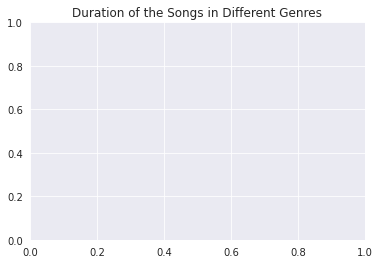

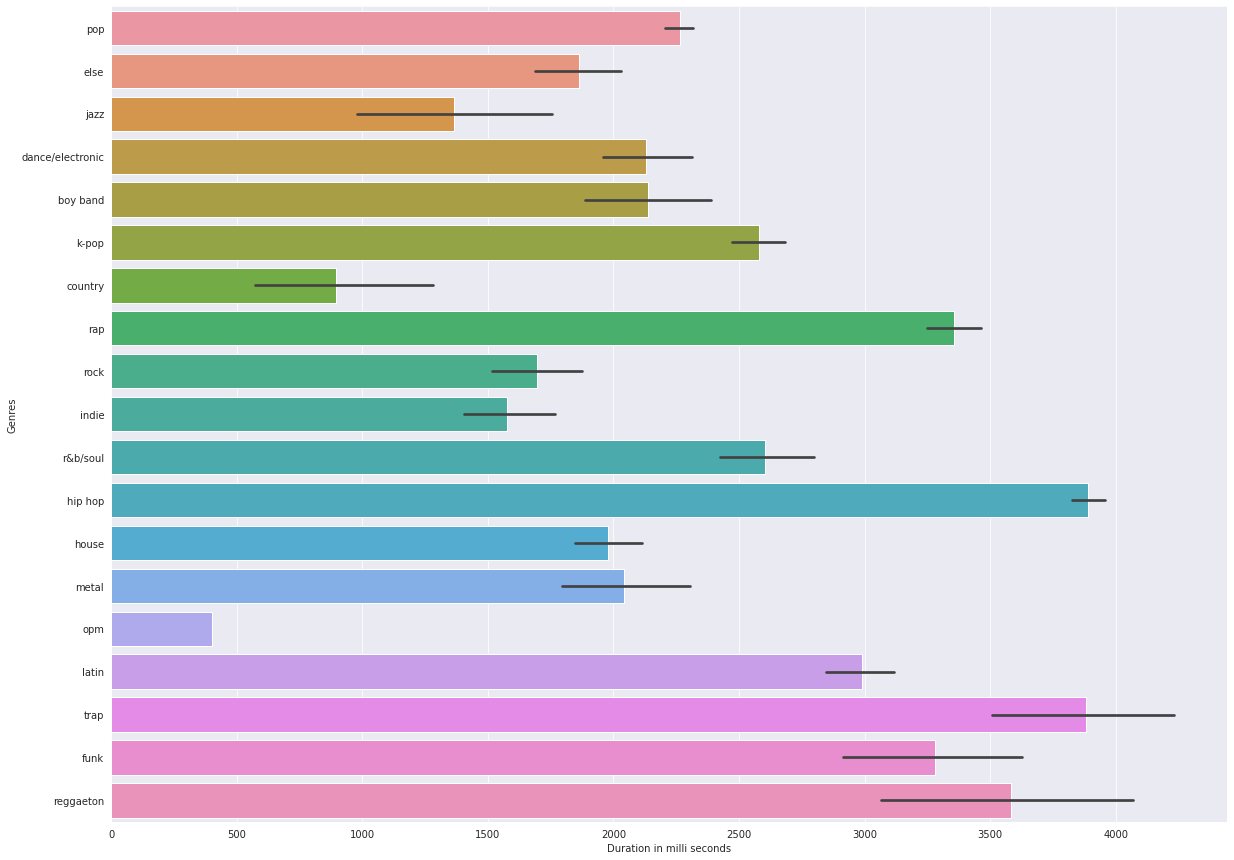

In [ ]:
plt.title("Duration of the Songs in Different Genres")
plt.figure(figsize=(20,15))
sns.color_palette("rocket", as_cmap= True)
sns.barplot(y='Genre', x='duration_ms', data=df1)
plt.xlabel("Duration in milli seconds")
plt.ylabel("Genres")